In [2]:
import numpy as np
import xlrd
import matplotlib.pyplot as plt
import freud.box
from freud import parallel, box, density
parallel.setNumThreads(4)
%matplotlib inline

In [18]:
freud.__version__

'0.8.2'

Text(0.5, 0, 'r')

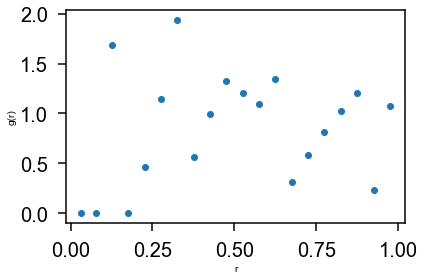

In [19]:
rdf = density.RDF(rmax=1.0, dr=0.05)# 1micron image min??
fbox = freud.box.Box.square(L=2.0)#distances in microns
fbox.periodic = (False, False,False)
#fbox.periodic  = (True,True,True)
sample_data = xlrd.open_workbook('M87.011.xlsx')
for i in range(14):
    sheet = sample_data.sheet_by_index(i)
    coordinate_array = [[sheet.cell_value(r,c) for c in range(sheet.ncols)] for r in range(sheet.nrows)]
    coordinates = np.array(coordinate_array)
    #print(coordinates.max())
    rdf.accumulate(fbox, coordinates, coordinates)#make sure per image.
rdf.compute(fbox, coordinates, coordinates)
r = rdf.R
y = rdf.RDF
plt.scatter(rdf.R, rdf.RDF)
plt.ylabel("g(r)")
plt.xlabel("r")
